In [2]:
%load_ext autoreload
%autoreload 2

import site
site.addsitedir('../')


Load the FIB image and peak data

In [3]:
import twtof
filename = "/home/jeromeb/work/userdata/Bharat/TOFWERK HD5/20230722_magnetotactic_HO027_1_Au_pos_spot2_run1_30kV_50pA.h5"
fib, mass, peak = twtof.imread(filename)


Interactive display of the image and the associated spectrum

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

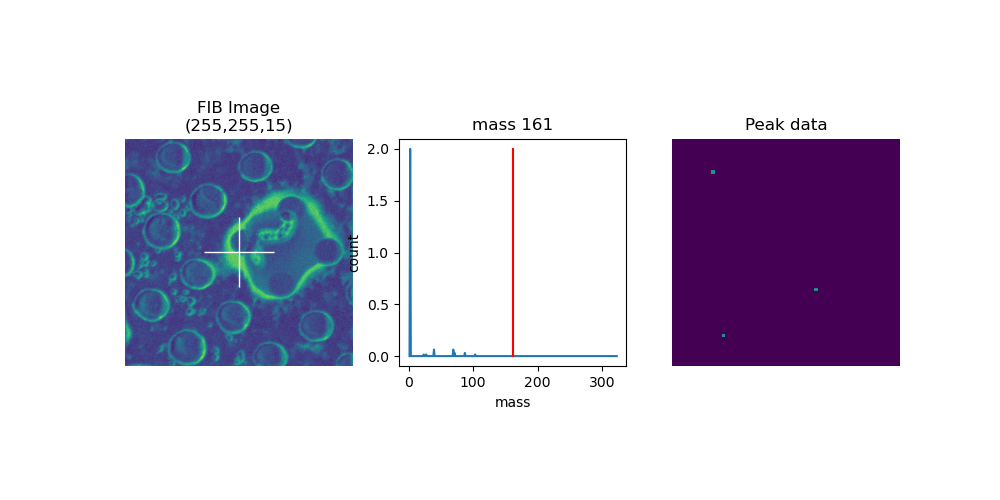

In [18]:
%matplotlib ipympl
from ipywidgets import interact
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(10,5))
axfib = ax[0].imshow(fib[0].squeeze())
crosshair = ax[0].plot(0,0,'w+',ms=50)
axpeak = ax[1].plot(peak[0,0,0].ravel())
sline = ax[1].plot((0,0),(0,2),'r-')
axmap = ax[2].imshow(peak[0,:,:,0].squeeze())
ax[1].set(xlabel='mass', ylabel='count')
ax[1].set_box_aspect(1)
ax[0].set_axis_off()
ax[2].set_axis_off()

@interact(
        x = (0,fib.shape[2]-1, 1), 
        y = (0,fib.shape[1]-1, 1), 
        z = (0, fib.shape[0]-1, 1), 
        c = (0,peak.shape[3]-1, 1),
        cmap = ['viridis','jet','gray'])
def display(x,y,z,c,cmap):
    axfib.set(data = fib[z], cmap=cmap)
    crosshair[0].set(data=([x],[y]))
    ax[0].set_title(f'FIB Image\n({x},{y},{z})')
    d = int(fib.shape[1]/peak.shape[1])    
    axpeak[0].set(data = (mass, peak[z,y//d,x//d].ravel()))
    sline[0].set(data=((c,c),(0,2)))
    ax[1].set_title(f'mass {c}')
    axmap.set(data = peak[z,:,:,c].squeeze(), cmap=cmap)
    ax[2].set_title('Peak data')

Load the peak table

In [19]:
with twtof.TofH5Reader(filename) as f:
    peak_df = f.load_peak_table()
peak_df

,label,mass,lower integration limit,upper integration limit
0,nominal,1.0,0.5,1.5
1,nominal,2.0,1.5,2.5
2,nominal,3.0,2.5,3.5
3,nominal,4.0,3.5,4.5
4,nominal,5.0,4.5,5.5
...,...,...,...,...
318,nominal,319.0,318.5,319.5
319,nominal,320.0,319.5,320.5
320,nominal,321.0,320.5,321.5
321,nominal,322.0,321.5,322.5


Load all the data in a dictionnary

In [7]:
data = twtof.as_dict(filename)
data['Acquisition log']

,timestamp,message
0,2023-07-22 16:04:00+01:00,Acquisition started
1,2023-07-22 16:05:54+01:00,Acquisition aborted after 32 complete writes. ...
